In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch import nn
from torch.utils.data import DataLoader, random_split
import ehtim as eh

from torchvision.transforms import v2
import data.dataset as ds
import torchvision
import os

import glob
from denoising_diffusion_pytorch import Unet, GaussianDiffusion, Trainer
import denoising_diffusion_pytorch as ddp

# use gpu
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")




Welcome to eht-imaging! v 1.2.8 



/home/lai075/miniconda3/envs/hf/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Unconditional Denoising Diffusion Model
model = Unet(
    dim = 64,
    dim_mults = (1, 2, 4, 8),
    flash_attn = True
)

diffusion = GaussianDiffusion(
    model,
    image_size = 64,
    timesteps = 1000,           # number of steps
    #sampling_timesteps = 250    # number of sampling timesteps (using ddim for faster inference [see citation for ddim paper])
)

trainer = Trainer(
    diffusion,
    'data/datasets/v1/jpegs/',
    train_batch_size = 32,
    train_lr = 8e-5,
    train_num_steps = 1000,         # total training steps
    gradient_accumulate_every = 2,    # gradient accumulation steps
    ema_decay = 0.995,                # exponential moving average decay
    amp = True,                       # turn on mixed precision
    calculate_fid = False              # whether to calculate fid during training
)

trainer = trainer.load('1')
# trainer.train()

Non-A100 GPU detected, using math or mem efficient attention if input tensor is on cuda
loading from version 2.0.1


sampling loop time step:   0%|          | 0/1000 [00:00<?, ?it/s]

sampling loop time step: 100%|██████████| 1000/1000 [00:15<00:00, 66.48it/s]


torch.Size([4, 3, 64, 64])


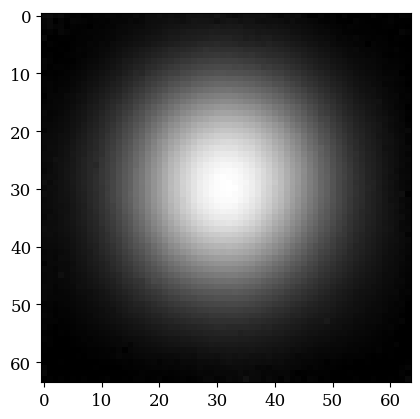

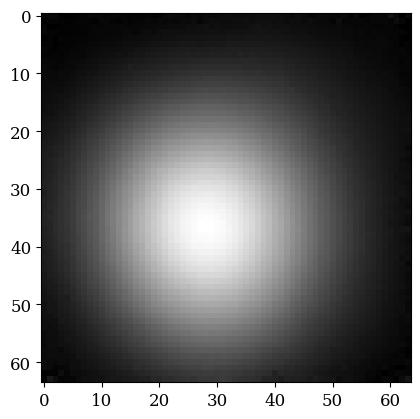

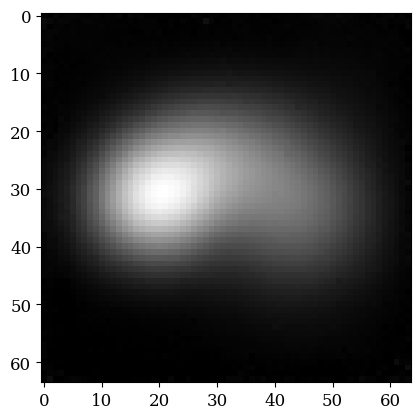

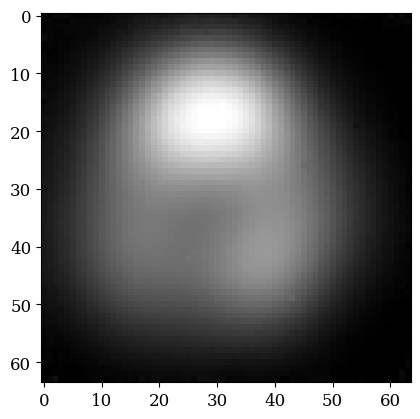

In [3]:

img_size = 64
channels = 1
samples = diffusion.sample(batch_size=4)

print(samples.shape)

for i in samples:
    fig, ax = plt.subplots()
    ax.imshow(i[0].reshape(img_size, img_size).cpu(), cmap='gray')